<a href="https://colab.research.google.com/github/PapeAlioune1996/MyDataScienceNotebook/blob/master/projet_datascience_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ce projet explore les données socioéconomiques, scolaires et criminelles de la ville **Chicago** pour répondre à des questions cruciales comme:

✅ Quels sont les quartiers les plus touchés par la criminalité ?

✅ Quelles écoles ont les meilleurs scores de sécurité ?

✅ Quels quartiers ont le plus haut pourcentage de foyers sous le seuil de pauvreté ?

**Comprendre les jeux de données :**

Pour résoudre les problèmes de ce projet, vous utiliserez trois ensembles de données disponibles sur le portail de données de la ville de Chicago :

Indicateurs socio-économiques,
Écoles publiques,
Données sur la criminalité
1. Indicateurs socio-économiques à Chicago
Cet ensemble de données contient une sélection de six indicateurs socio-économiques d'importance pour la santé publique et un « indice de difficultés », pour chaque zone communautaire de Chicago, pour les années 2008 à 2012.

Une description détaillée de cet ensemble de données et de l'ensemble de données original peut être obtenue sur le portail de données de Chicago à l'adresse suivante :

https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

2. Écoles publiques de Chicago
Cet ensemble de données montre toutes les données de performance au niveau de l'école utilisées pour créer les bulletins scolaires de CPS pour l'année scolaire 2011-2012. Cet ensemble de données est fourni par le portail de données de la ville de Chicago.

Une description détaillée de cet ensemble de données et de l'ensemble de données original peut être obtenue sur le portail de données de Chicago à l'adresse suivante :

https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

3. Données sur la criminalité à Chicago
Cet ensemble de données reflète les incidents criminels déclarés (à l'exception des meurtres pour lesquels il existe des données pour chaque victime) qui se sont produits dans la ville de Chicago de 2001 à aujourd'hui, moins les sept jours les plus récents.

Une description détaillée de cet ensemble de données et de l'ensemble de données original peut être obtenue sur le portail de données de Chicago à l'adresse suivante :

In [ ]:
#installations des bibliotheques necessaires
!pip install ipython-sql prettytable
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sqlite3

In [33]:
#import des bibliotheque utilisé
import prettytable
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
prettytable.DEFAULT = 'DEFAULT'

In [34]:
# Établir une connexion avec la base de données SQLite
conn = sqlite3.connect('FinalDB.db')
cursor = conn.cursor()

# Charger les jeux de données dans les DataFrames pandas
census_data_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv')
schools_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv')
crime_data_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv')


# Stocker les DataFrames dans les tables de la base de données
census_data_df.to_sql('CENSUS_DATA', conn, if_exists='replace', index=False)
schools_df.to_sql('CHICAGO_PUBLIC_SCHOOLS', conn, if_exists='replace', index=False)
crime_data_df.to_sql('CHICAGO_CRIME_DATA', conn, if_exists='replace', index=False)


# Valider les modifications et fermer la connexion
conn.commit()
conn.close()

In [35]:
# Chargement du module SQL magic pour exécuter directement des requêtes SQL dans un notebook Jupyter, rendant l'analyse plus fluide et interactive.

%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [36]:
# Exemple de requête pour vérifier les tables de la base de donnée FinalDB :
conn = sqlite3.connect('FinalDB.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
conn.close()

[('CENSUS_DATA',), ('CHICAGO_PUBLIC_SCHOOLS',), ('CHICAGO_CRIME_DATA',)]


In [37]:
# Établir une connexion entre le module SQL magic et la base de données `FinalDB.db`
%sql sqlite:///FinalDB.db

**Reponse aux Questions**
Maintenant, écrivez et exécutez des requêtes SQL pour résoudre des problèmes d'affectation.

In [38]:
# Trouvez le nombre total de crimes enregistrés dans la table CRIME.
%sql SELECT COUNT(*) from CHICAGO_CRIME_DATA

 * sqlite:///FinalDB.db
Done.


COUNT(*)
533


In [39]:
# Liste des noms et numéros des zones communautaires dont le revenu par habitant est inférieur à 11 000
%sql SELECT COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER FROM CENSUS_DATA WHERE PER_CAPITA_INCOME < 11000;


 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,COMMUNITY_AREA_NUMBER
West Garfield Park,26.0
South Lawndale,30.0
Fuller Park,37.0
Riverdale,54.0


In [40]:
# Liste de tous les numéros d'affaires concernant des crimes impliquant des mineurs
# (les enfants ne sont pas considérés comme des mineurs aux fins de l'analyse criminelle)
%sql SELECT CASE_NUMBER FROM CHICAGO_CRIME_DATA WHERE DESCRIPTION LIKE '%MINOR%';

 * sqlite:///FinalDB.db
Done.


CASE_NUMBER
HL266884
HK238408


In [41]:
# Liste de tous les crimes d'enlèvement impliquant un enfant ?
%sql SELECT * FROM CHICAGO_CRIME_DATA WHERE PRIMARY_TYPE = 'KIDNAPPING' AND DESCRIPTION LIKE '%CHILD%';

 * sqlite:///FinalDB.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,1533,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.87490841,-87.75024931,"(41.874908413, -87.750249307)"


In [42]:
# Dressez la liste des types de crimes enregistrés dans les écoles. (Pas de répétitions)
%sql SELECT DISTINCT PRIMARY_TYPE FROM CHICAGO_CRIME_DATA WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%';

 * sqlite:///FinalDB.db
Done.


PRIMARY_TYPE
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION


In [43]:
# Indiquez le type d'école ainsi que la note de sécurité moyenne pour chaque type d'école.
%sql SELECT "Elementary, Middle, or High School", AVG(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS GROUP BY "Elementary, Middle, or High School";


 * sqlite:///FinalDB.db
Done.


"Elementary, Middle, or High School",AVG(SAFETY_SCORE)
ES,49.52038369304557
HS,49.62352941176471
MS,48.0


In [44]:
# Liste des 5 zones communautaires où le pourcentage de ménages sous le seuil de pauvreté est le plus élevé
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 5;


 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME
Riverdale
Fuller Park
Englewood
North Lawndale
East Garfield Park


In [45]:
# Quelle est la zone de la communauté la plus exposée à la criminalité ? Afficher uniquement le numéro de la zone de la communauté.
%sql SELECT COMMUNITY_AREA_NUMBER FROM CHICAGO_CRIME_DATA GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(*) DESC LIMIT 1;


 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER
25.0


In [46]:
# Utiliser une sous-requête pour trouver le nom de la zone communautaire ayant l'indice de difficulté le plus élevé.
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA WHERE HARDSHIP_INDEX IN (SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA);


 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME
Riverdale


In [51]:
# Utiliser une sous-requête pour déterminer le nom de la zone communautaire où le nombre de délits est le plus élevé.
%sql SELECT COMMUNITY_AREA_NAME AS zone_communautaire  FROM CENSUS_DATA WHERE COMMUNITY_AREA_NUMBER = (SELECT COMMUNITY_AREA_NUMBER FROM CHICAGO_CRIME_DATA GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(*) DESC LIMIT 1)


 * sqlite:///FinalDB.db
Done.


zone_communautaire
Austin


In [49]:
# Quelle est la note moyenne de sécurité pour les écoles moyennes ?
%sql SELECT AVG(SAFETY_SCORE) AS Moyenne_de_sécurité FROM CHICAGO_PUBLIC_SCHOOLS WHERE "Elementary, Middle, or High School" = 'MS';


 * sqlite:///FinalDB.db
Done.


Moyenne_de_sécurité
48.0


 * sqlite:///FinalDB.db
Done.


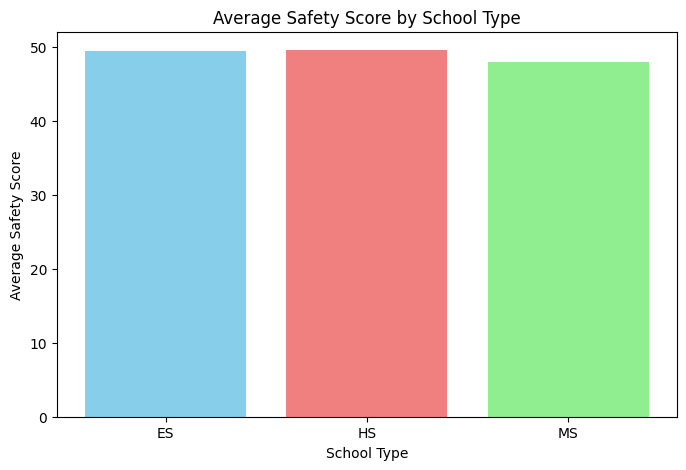

In [53]:
# manipulate and visualize data with panda, matplotlib, seaborn, ...
# Exemple 1 : Diagramme à barres de la note moyenne de sécurité par type d'école
school_safety = %sql SELECT "Elementary, Middle, or High School", AVG(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS GROUP BY "Elementary, Middle, or High School";
school_types = [row[0] for row in school_safety]
avg_safety_scores = [row[1] for row in school_safety]
plt.figure(figsize=(8, 5))
plt.bar(school_types, avg_safety_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Average Safety Score by School Type')
plt.xlabel('School Type')
plt.ylabel('Average Safety Score')
plt.show()



 * sqlite:///FinalDB.db
Done.


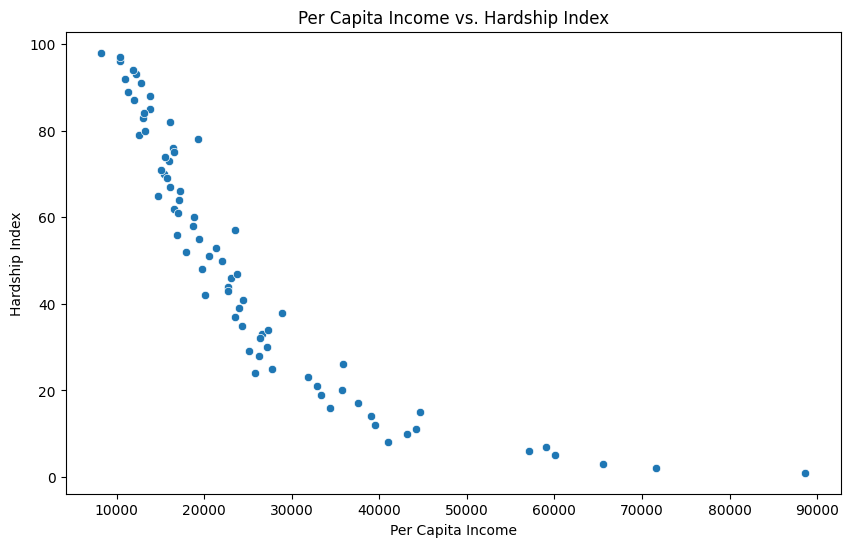

In [54]:
# Exemple 2 : Diagramme de dispersion du revenu par habitant en fonction de l'indice de pénibilité

income_hardship = %sql SELECT PER_CAPITA_INCOME, HARDSHIP_INDEX FROM CENSUS_DATA;
per_capita_incomes = [row[0] for row in income_hardship]
hardship_indices = [row[1] for row in income_hardship]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=per_capita_incomes, y=hardship_indices)
plt.title('Per Capita Income vs. Hardship Index')
plt.xlabel('Per Capita Income')
plt.ylabel('Hardship Index')
plt.show()

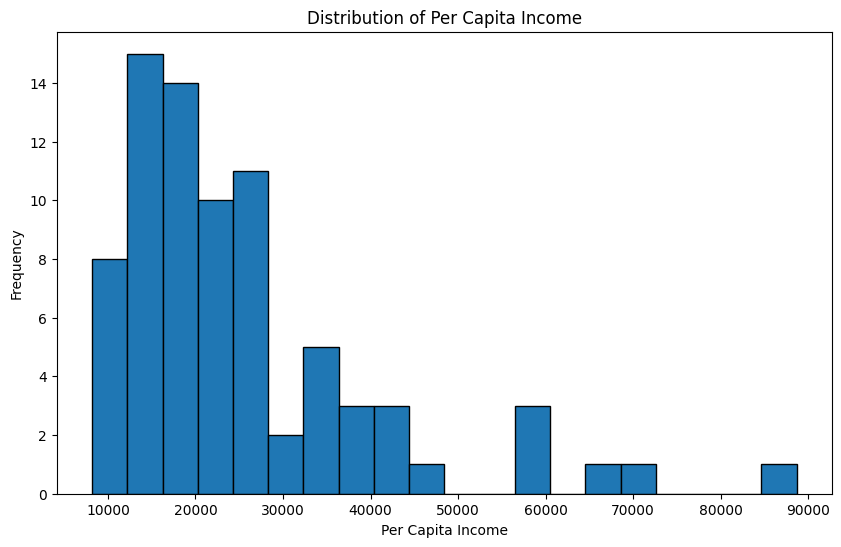

In [55]:
# Exemple 3 : Diagramme en barres de la distribution du revenu par habitant
plt.figure(figsize=(10, 6))
plt.hist(census_data_df['PER_CAPITA_INCOME'], bins=20, edgecolor='black')
plt.xlabel('Per Capita Income')
plt.ylabel('Frequency')
plt.title('Distribution of Per Capita Income')
plt.show()